Here, we have a small dataset which essentially represents a number of patients who had **Kyphosis** which is a spinal condition and then they had an operation.
The operation was a corrective spinal surgery and the Kyphosis column basically represents whether the Kyphosis condition was absent or present after the operation.

This data set contains the following features:

- Kyphosis: whether the Kyphosis condition was absent or present after the operation
- Age: the age of the person in months. (As this is data on children)
- Number: number of vertebrae involved in the operation
- Start: the number of the first or top most or vertebrae that was operated on

Not getting much into the medical terminologies, here we really just deal with all these columns as numbers and the Kyphosis as essentially a target absent or present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# EDA

Just checking out a simple pairplot for this small dataset:

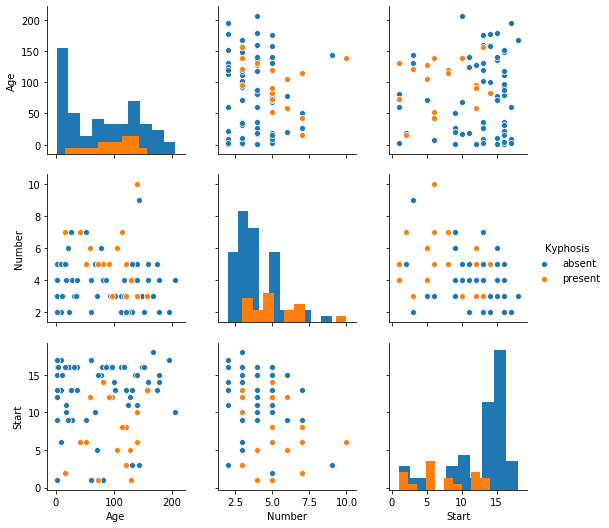

In [6]:
sns.pairplot(df,hue='Kyphosis',diag_kind='hist')

## Train Test Split

Split up the data into a training set and a test set.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [9]:
X_train , x_test, y_train,y_test = train_test_split(X,y,test_size = 0.30)

## Decision Trees

Training a single decision tree:

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation

Let's evaluate the decision tree.

In [13]:
predictions = dtree.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(predictions,y_test))
print('\n')
print(classification_report(predictions,y_test))

[[18  5]
 [ 1  1]]


              precision    recall  f1-score   support

      absent       0.95      0.78      0.86        23
     present       0.17      0.50      0.25         2

    accuracy                           0.76        25
   macro avg       0.56      0.64      0.55        25
weighted avg       0.88      0.76      0.81        25



## Random Forests

Now let's compare the decision tree model to a random forest.

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(n_estimators=200)

In [18]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc_pred = rfc.predict(x_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[17  2]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [21]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[17  2]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [22]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[17  2]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [23]:
rfc = RandomForestClassifier(n_estimators=175)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[17  2]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [24]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[17  2]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



## Tree Visualization
Scikit learn actually has some built-in visualization capabilities for decision trees. It requires you to install the ```pydotplus``` library. 
Let’s visualize this tree by first creating a dot file using Scikit-Learn ```export_graphviz``` module and then processing it with [graphviz](http://graphviz.org/).
Below is shown what it looks like and the code to execute this:

In [25]:
from io import StringIO

In [26]:
from sklearn.tree import export_graphviz

In [27]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [28]:
dot_data = StringIO()

## it writes a graph object into a dot file

In [29]:
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [30]:
from IPython.display import Image

In [31]:
import pydotplus

In [32]:
pydotplus.graph_from_dot_data(dot_data.getvalue())

In [33]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="Start <= 8.5\\ngini = 0.316\\nsamples = 56\\nvalue = [45, 11]", fillcolor="#eba069"] ;\n1 [label="Number <= 5.5\\ngini = 0.473\\nsamples = 13\\nvalue = [5, 8]", fillcolor="#b5daf5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Start <= 2.5\\ngini = 0.469\\nsamples = 8\\nvalue = [5, 3]", fillcolor="#f5cdb0"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]", fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label="Number <= 3.5\\ngini = 0.48\\nsamples = 5\\nvalue = [2, 3]", fillcolor="#bddef6"] ;\n2 -> 4 ;\n5 [label="Start <= 4.0\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 1]", fillcolor="#f2c09c"] ;\n4 -> 5 ;\n6 [label="Age <= 126.0\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]", fillcolor="#ffffff"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]", fillcolor="#399de5"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\

In [34]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [58]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## got resolved by the command conda install -c anaconda graphviz

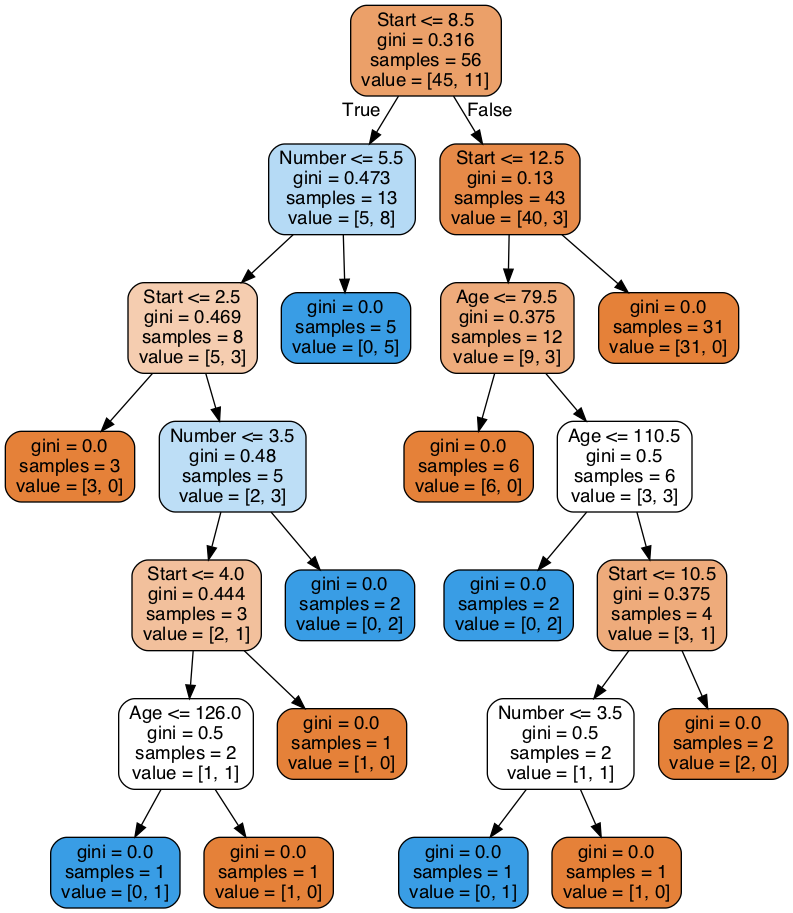

In [35]:
Image(graph.create_png())

### Understanding the Contents of the Node

**gini** : The gini score is a metric that quantifies the purity of the node/leaf. A gini score greater than zero implies that samples contained within that node belong to different classes. A gini score of zero means that the node is pure, that within that node only a single class of samples exist. If we have a gini score greater than zero; therefore, we know that the samples contained within the root node belong to different classes.

**samples**: 
value = [45,11]: The value list tells you how many samples at the given node fall into each category. The first element of the list shows the number of samples that belong to the *absent* class, the second element of the list shows the number of samples that belong to the *present* class. Notice how this node is not a pure one since different types of classes are contained within the same node. 

**class** : The class value shows the prediction a given node will make and it can be determined from the value list. Whichever class occurs the most within the node will be selected as the class value. 

In [62]:
graph.write_png('Treeoutput.png')

True